In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

In [70]:
data = pd.read_csv('Angles.csv')

In [71]:
data.head()

,Time,Right_Angle,Left_Angle
0,0.000044,0.0000,0.0000
1,0.412319,-200.5765,-202.9366
2,0.431402,-198.4459,-203.1802
3,0.447290,-198.8513,-204.0276
4,0.464463,-198.5979,-205.2044


In [72]:
x = data['Time']
y = data['Left_Angle']

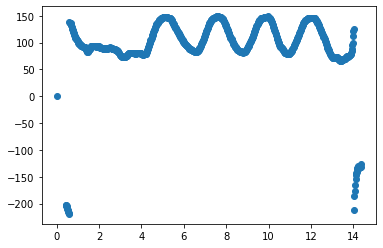

In [73]:
plt.scatter(x,y)


In [74]:
df_refined = data[data['Time'] < 12]
df_refined2 = df_refined[df_refined['Time'] > 4.25]

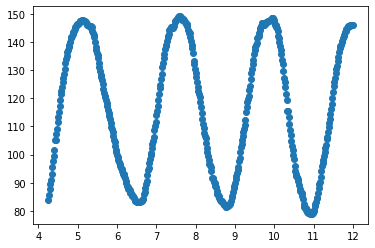

In [75]:
x = df_refined2['Time']
y = df_refined2['Left_Angle']
plt.scatter(x,y)

In [76]:
# y = A.Sin(Bx + C) + D
#Rough calculation of Amplitude(A)
A = (150-80)/2
print('Amplitude : ',A)


Amplitude :  35.0


In [77]:
#Rough calculation of Phase Shift(D)
D = (150+80)/2
print('Offset : ',D)

Offset :  115.0


In [78]:
#define the sin_function
def sin_fn(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset




In [79]:

A = 35
B =3
C =1
D = 115

p0 = [B,A,C,D]

fit = curve_fit(sin_fn, x, y, p0=p0)
fit_A = fit[0][1]
fit_B = fit[0][0]
fit_C = fit[0][2]
fit_D = fit[0][3]
# log the true vs fitted values
print("True A: {}, Fitted A: {}".format(A, fit_A))
print("True B: {}, Fitted B: {}".format(B, fit_B))
print("True C: {}, Fitted C: {}".format(C, fit_C))
print("True D: {}, Fitted D: {}".format(D, fit_D))


True A: 35, Fitted A: -33.602335886631465
True B: 3, Fitted B: 2.742468493655414
True C: 1, Fitted C: 2.9650919834508307
True D: 115, Fitted D: 116.13037400024918


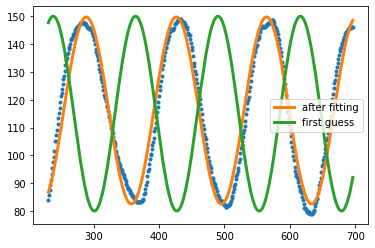

In [80]:
# we'll use this to plot our first estimate. This might already be good enough for you
y_first_guess = sin_fn(x, *p0)

# recreate the fitted curve using the optimized parameters
y_fit = sin_fn(x, *fit[0])

plt.plot(y, '.')
plt.plot(y_fit, label='after fitting', linewidth=3)
plt.plot(y_first_guess, label='first guess', linewidth=3)
plt.legend()
plt.show()



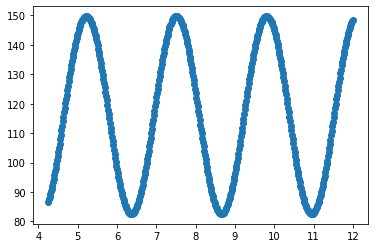

In [81]:
plt.scatter(x,y_fit)